## Libraries Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

In [2]:
df = pd.read_csv("phishing.csv")
df.sample(5)


,Unnamed: 0,URL,Label
224550,224550,ottawa.kijiji.ca/c-buy-and-sell-art-collectibl...,Safe
328088,328088,facebook.com/missutahusa?sk=wall,Safe
507895,507895,csob-ib.in/project/i.gif,a phishing Link
538082,538082,flutygoy.net/82okzzkq,a phishing Link
538137,538137,eaglemouth.org/d5436gh,a phishing Link


## EDA

In [3]:
print("Shape:", df.shape)

Shape: (549346, 3)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  549346 non-null  int64 
 1   URL         549346 non-null  object
 2   Label       549346 non-null  object
dtypes: int64(1), object(2)
memory usage: 12.6+ MB


In [5]:
# check null values
null = df.isnull().sum().reset_index(name='missing_val')
null[null['missing_val']!= 0]

,index,missing_val


In [6]:
df.describe()

,Unnamed: 0
count,549346.000000
mean,274672.500000
std,158582.674826
min,0.000000
25%,137336.250000
50%,274672.500000
75%,412008.750000
max,549345.000000


In [7]:
df.Label.value_counts()

Safe               392924
a phishing Link    156422
Name: Label, dtype: int64

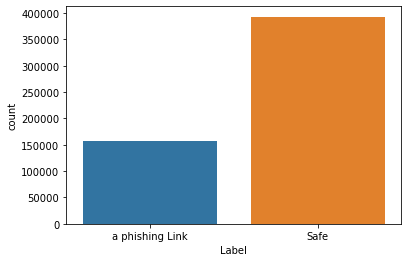

In [8]:
sns.countplot(data=df, x="Label")
plt.show()

## Data Processing

In [9]:
# shuffle the data

df_shuffled = shuffle(df, random_state=42)

In [10]:
# Take a sample of the data (10000)
sample_size= 10000

In [11]:
df_sample = df_shuffled[:sample_size].copy()

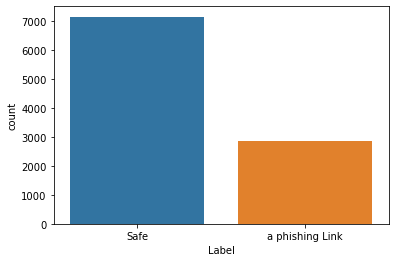

In [12]:
# check distribution 
sns.countplot(data=df_sample, x='Label')
plt.show()

In [13]:
## Encode the Label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_sample['Label'] = le.fit_transform(df_sample['Label'])


In [14]:
df_sample['Label'].unique()

array([0, 1])

In [15]:
# Split the features and the target

X = df_sample[['URL']].copy()
y = df_sample.Label.copy()

In [16]:
# Initialize Tokenizer Stemmer and Vectorizer

tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer("english")
cv = CountVectorizer()

## Data Preparation

In [17]:
def prepare_data(X) :
    X['text_tokenized'] = X.URL.map(lambda t: tokenizer.tokenize(t))
    X['text_stemmed'] = X.text_tokenized.map(lambda t: [stemmer.stem(word) for word in t])
    X['text_sent'] = X.text_stemmed.map(lambda t: ' '.join(t))
    features = cv.fit_transform(X.text_sent)
    return X, features

In [18]:
X, features = prepare_data(X)

In [19]:
type(X.URL)

pandas.core.series.Series

In [20]:
X

,URL,text_tokenized,text_stemmed,text_sent
452638,tubevector.com/search/?q=erika,"[tubevector, com, search, q, erika]","[tubevector, com, search, q, erika]",tubevector com search q erika
306476,classmates.com/directory/school/Marian%20Chris...,"[classmates, com, directory, school, Marian, C...","[classmat, com, directori, school, marian, chr...",classmat com directori school marian christian...
100735,isgsi.com/office/adb/c58c94eccbfb951bd4ba5f2a6...,"[isgsi, com, office, adb, c, c, eccbfb, bd, ba...","[isgsi, com, offic, adb, c, c, eccbfb, bd, ba,...",isgsi com offic adb c c eccbfb bd ba f a a d a...
384460,manufacturersnews.com/executives.asp?start=CEN,"[manufacturersnews, com, executives, asp, star...","[manufacturersnew, com, execut, asp, start, cen]",manufacturersnew com execut asp start cen
40436,'9d345009-a-62cb3a1a-s-sites.googlegroups.com/...,"[d, a, cb, a, a, s, sites, googlegroups, com, ...","[d, a, cb, a, a, s, site, googlegroup, com, si...",d a cb a a s site googlegroup com site stickam...
...,...,...,...,...
363623,islandhideaways.com/stmartin/villas/serena/,"[islandhideaways, com, stmartin, villas, serena]","[islandhideaway, com, stmartin, villa, serena]",islandhideaway com stmartin villa serena
352027,historyorb.com/day/january/16,"[historyorb, com, day, january]","[historyorb, com, day, januari]",historyorb com day januari
70838,www.angelfire.com/ar/rm/,"[www, angelfire, com, ar, rm]","[www, angelfir, com, ar, rm]",www angelfir com ar rm
481409,xfamily.org/index.php/Cult_Killer:_The_Rick_Ro...,"[xfamily, org, index, php, Cult, Killer, The, ...","[xfamili, org, index, php, cult, killer, the, ...",xfamili org index php cult killer the rick rod...


## Modeling

In [21]:
# Import models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [22]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()

In [23]:
def train_test_model(model, X, y, training_percentage) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    precision = precision_score(testY, predY, pos_label=1)
    recall = recall_score(testY, predY, pos_label=1)
    return accuracy, precision, recall  

In [24]:
training_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [25]:
def model_results(model) :
    results = []
    for p in training_sizes :
        results.append(train_test_model(model, features, y, p))
    return pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall'])

In [26]:
logreg_results = model_results(logreg)
knn_results = model_results(knn)
dtree_results = model_results(dtree)
rfc_results = model_results(rfc)
svc_results = model_results(svc)

In [27]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
model_results = [logreg_results, knn_results, dtree_results, rfc_results, svc_results]

In [28]:
accuracies = []
precisions = []
recalls = []
for model in model_results :
    accuracies.append(model.Accuracy.values)
    precisions.append(model.Precision.values)
    recalls.append(model.Recall.values)

In [29]:
accuracies = pd.DataFrame(np.transpose(accuracies), columns=models, index=training_sizes*100)
precisions = pd.DataFrame(np.transpose(precisions), columns=models, index=training_sizes*100)
recalls = pd.DataFrame(np.transpose(recalls), columns=models, index=training_sizes*100)

In [30]:
accuracies

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.855556,0.720778,0.842778,0.864333,0.824556
20.0,0.877375,0.748375,0.861125,0.878375,0.857375
30.0,0.885714,0.746143,0.868000,0.888286,0.872286
40.0,0.893333,0.769500,0.875500,0.896833,0.878333
50.0,0.899600,0.784800,0.887000,0.899400,0.884600
60.0,0.906000,0.765500,0.879250,0.904250,0.891500
70.0,0.905698,0.776408,0.883372,0.906031,0.894369
80.0,0.910000,0.778500,0.891000,0.906500,0.896500
90.0,0.932000,0.795000,0.897000,0.921000,0.912000


In [31]:
precisions

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.912395,0.510576,0.742246,0.917698,0.938938
20.0,0.919075,0.554930,0.805195,0.920026,0.918800
30.0,0.912088,0.548584,0.803955,0.923505,0.908419
40.0,0.914352,0.586333,0.824279,0.923434,0.910684
50.0,0.927978,0.616348,0.855848,0.933521,0.921782
60.0,0.932356,0.578424,0.828032,0.930839,0.928658
70.0,0.917151,0.600000,0.814126,0.920937,0.916667
80.0,0.918630,0.593023,0.840077,0.912017,0.908072
90.0,0.939516,0.621622,0.856031,0.919028,0.923077


In [32]:
recalls

,Logistic Regression,KNN,Decision Tree,Random Forest,SVM
10.0,0.546869,0.544535,0.688837,0.576818,0.412680
20.0,0.625984,0.603237,0.678040,0.629046,0.549431
30.0,0.664000,0.629500,0.711500,0.664000,0.615000
40.0,0.691365,0.655776,0.717036,0.696616,0.636523
50.0,0.703289,0.654304,0.727082,0.697691,0.651505
60.0,0.723535,0.661417,0.728784,0.718285,0.671916
70.0,0.736289,0.651109,0.766628,0.733956,0.693116
80.0,0.751313,0.714536,0.763573,0.744308,0.709282
90.0,0.814685,0.723776,0.769231,0.793706,0.755245


Text(0, 0.5, 'Accuracy')

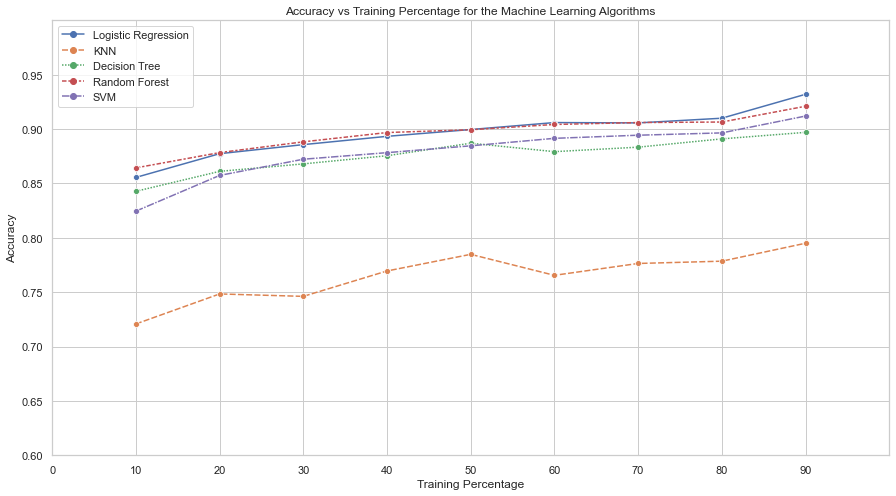

In [33]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = accuracies, markers= ['o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0.6,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.6, 1, 0.05))
g.set_title("Accuracy vs Training Percentage for the Machine Learning Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Accuracy")

Text(0, 0.5, 'Precision')

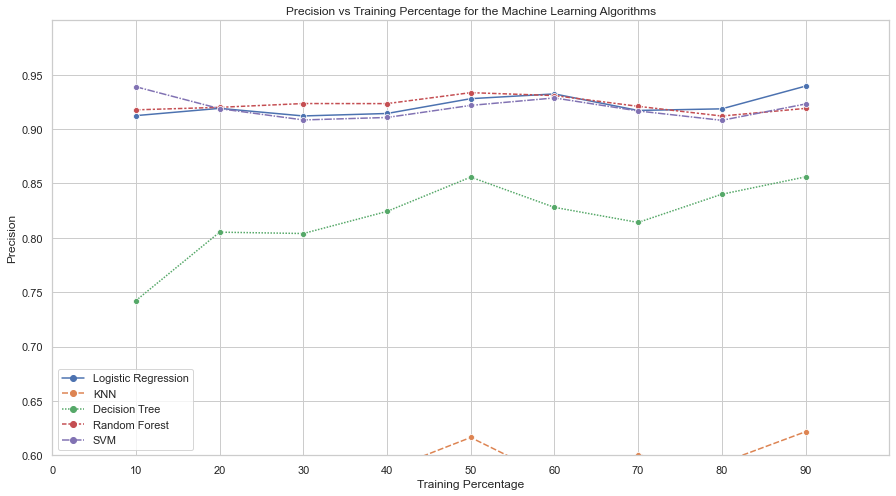

In [34]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = precisions, markers= ['o', 'o', 'o', 'o', 'o'])
g.set(xlim = (0,100), ylim = (0.6,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.6, 1, 0.05))
g.set_title("Precision vs Training Percentage for the Machine Learning Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Precision")

In [35]:
def predict(txt):
     url = cv.transform([txt]).toarray() # convert text to bag of words model (Vector)
     phish = rfc.predict(url) # predict Whether the 
     phish = le.inverse_transform(phish) # find the url corresponding with the predicted value
     print ("The Url is a ", phish[0]) # printing whether the url is a phishing link or not

predict('https://my.vultr.com/')  # Call the function

The Url is a  Safe


In [36]:
# UsING Saved Model

In [37]:
import pickle
filename = 'rfc_model.pkl'
pickle.dump(rfc, open(filename, 'wb'))

In [38]:
model = pickle.load(open('rfc_model.pkl', 'rb'))

In [52]:
def predict(txt):
     url = cv.transform([txt]).toarray() # convert text to bag of words model (Vector)
     phish = model.predict(url) # predict Whether the 
     phish = le.inverse_transform(phish) # find the url corresponding with the predicted value
     print ("The Url is ", phish[0]) # printing whether the url is a phishing link or not

predict('http://xvtr.sd/')  # Call the function

The Url is  a phishing Link


In [40]:
# Uisng the saved model and vectorizer

In [41]:
pickle.dump(cv, open("vectorizer.pkl", "wb")) #Save vectorizer
vectorizer= pickle.load(open("vectorizer.pkl", 'rb'))     #Load vectorizer   

In [42]:
def predict(txt):
     url = vectorizer.transform([txt]).toarray() # convert text to bag of words model (Vector)
     phish = model.predict(url) # predict Whether the 
     phish = le.inverse_transform(phish) # find the url corresponding with the predicted value
     print ("The Url is a ", phish[0]) # printing whether the url is a phishing link or not

predict('https://my.vultr.com/')  # Call the function

The Url is a  Safe


In [43]:
#!pip install tensorflow

In [44]:
#!pip install openml

In [45]:
final = df.copy()

In [46]:
final.replace(to_replace='bad', value='a phishing Link', inplace=True)

In [47]:
final.replace(to_replace='good', value='Safe', inplace=True)

In [48]:
final.Label.value_counts()

Safe               392924
a phishing Link    156422
Name: Label, dtype: int64

In [49]:
final.to_csv('phishing.csv')